In [ ]:
clear()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# US crime data

In [40]:
USArrests = pd.read_csv('USArrests.csv')

For each of the fifty states in the United States, the data set contains 
- the number of arrests per 100, 000 residents for each of three crimes: Assault, Murder, and Rape. 
- UrbanPop (the percent of the population in each state living in urban areas).

In [41]:
USArrests.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [42]:
USArrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [43]:
# we often standardize the data

scaler = StandardScaler(with_std=True,
                        with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests.iloc[:,1:5])

In [44]:
USArrests_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

##### PCA for USArrests data

In [45]:
pcaUS = PCA()

In [46]:
pcaUS.fit(USArrests_scaled)

PCA()

In [47]:
scores = pcaUS.transform(USArrests_scaled)

In [48]:
np.shape(scores)

(50, 4)

In [49]:
pcaUS.components_ 
np.shape(pcaUS.components_)

(4, 4)

Text(0, 0.5, 'PC2')

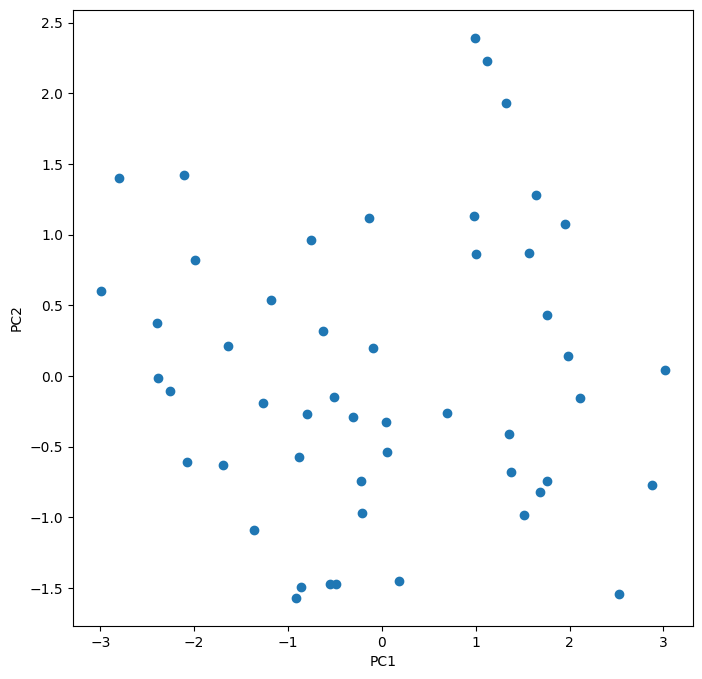

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

In [51]:
USArrests['PC1']=scores[:,0]
USArrests['PC2']=scores[:,1]
USArrests

,States,Murder,Assault,UrbanPop,Rape,PC1,PC2
0,Alabama,13.2,236,58,21.2,0.985566,1.133392
1,Alaska,10.0,263,48,44.5,1.950138,1.073213
2,Arizona,8.1,294,80,31.0,1.763164,-0.745957
3,Arkansas,8.8,190,50,19.5,-0.141420,1.119797
4,California,9.0,276,91,40.6,2.523980,-1.542934
5,Colorado,7.9,204,78,38.7,1.514563,-0.987555
6,Connecticut,3.3,110,77,11.1,-1.358647,-1.088928
7,Delaware,5.9,238,72,15.8,0.047709,-0.325359
8,Florida,15.4,335,80,31.9,3.013042,0.039229
9,Georgia,17.4,211,60,25.8,1.639283,1.278942


In [52]:
pcaUS.explained_variance_


array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [53]:
pcaUS.explained_variance_ratio_


array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

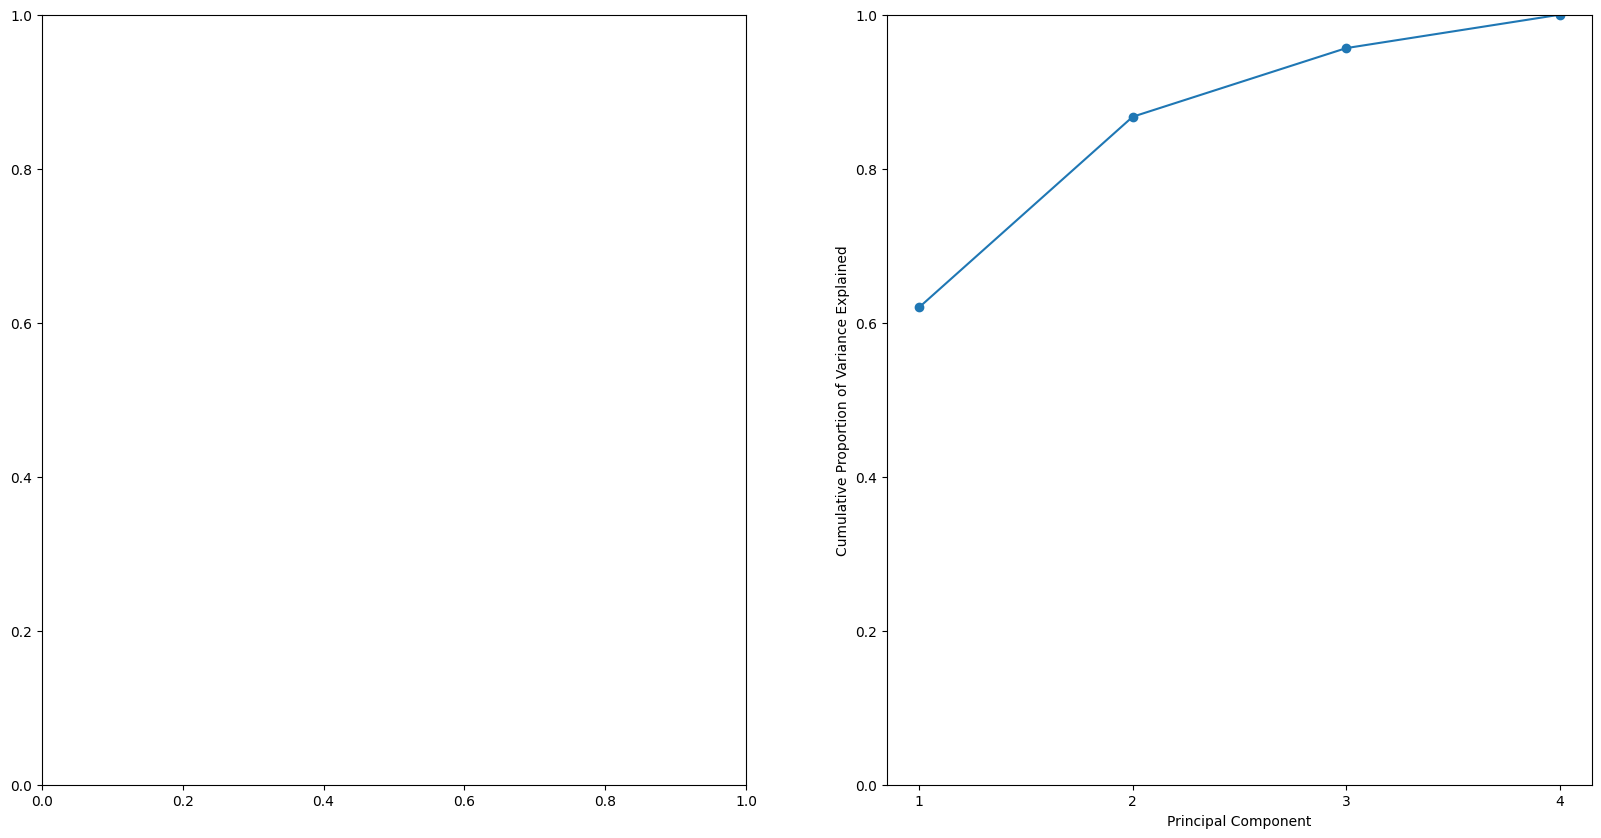

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ticks = np.arange(pcaUS.n_components_)+1

ax = axes[1]
ax.plot(ticks,
        pcaUS.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)


In [55]:
np.shape(scores)
V=pcaUS.components_ 
np.min(np.matmul(scores,V)-USArrests_scaled)
score12=scores[:,0:2]
#score12[:,1]-scores[:,1]
np.matmul(np.linalg.inv(np.matmul(np.transpose(score12),score12)), np.matmul(np.transpose(score12),USArrests_scaled))

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864]])

In [56]:
V

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

# 25 Portfolios

In [57]:
data = pd.read_csv('X25Portfolios.csv')
stockdata=data.iloc[:,1:102]
np.shape(stockdata)

(25438, 25)

In [58]:
stockdata

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,-0.46,0.72,0.85,0.30,-0.57,0.34,1.73,-0.02,-0.55,0.09,...,0.00,0.30,-0.32,0.02,0.41,0.32,-0.06,0.44,-0.31,0.40
1,0.57,0.77,-1.98,-0.41,-0.52,0.07,-0.06,-0.46,-0.03,0.40,...,-0.03,0.09,1.04,0.49,0.56,0.50,0.60,0.33,0.51,0.24
2,0.38,-0.46,-0.77,1.48,-0.28,-0.39,-0.04,0.35,0.07,0.26,...,0.33,0.11,0.79,-0.11,-0.44,0.19,0.41,-0.12,-0.23,0.33
3,-0.81,-1.18,1.26,0.88,-0.61,0.63,-0.59,-0.84,-1.31,-0.92,...,0.05,0.10,0.15,0.51,-0.08,-0.05,0.39,0.09,-0.16,1.53
4,0.56,-0.13,-1.10,-1.57,0.33,0.49,0.81,0.30,0.17,-0.52,...,0.09,0.36,0.37,0.51,1.27,0.41,0.36,0.01,0.16,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25433,0.45,0.16,0.50,0.03,-0.10,0.70,0.72,0.50,0.18,-0.09,...,0.44,0.17,0.09,0.24,0.20,0.07,-0.38,-0.27,-0.43,0.16
25434,0.14,-0.11,0.30,0.82,0.58,1.06,0.89,0.40,0.77,0.43,...,0.39,0.19,0.72,0.23,0.50,0.83,0.11,0.09,0.31,0.07
25435,-2.53,-2.12,-2.26,-1.87,-0.73,-2.07,-1.59,-0.97,-0.95,-0.50,...,-1.60,-1.00,-0.53,-0.55,0.28,-1.56,-0.89,-0.58,-0.12,0.29
25436,0.61,0.30,0.43,0.76,0.51,0.28,-0.02,0.45,0.62,-0.06,...,-0.01,0.09,-0.07,0.36,-0.59,0.71,-0.05,-0.20,0.10,0.06


In [59]:
pcaStock = PCA()

In [60]:
pcaStock.fit(stockdata)

PCA()

In [61]:
scores = pcaStock.transform(stockdata)

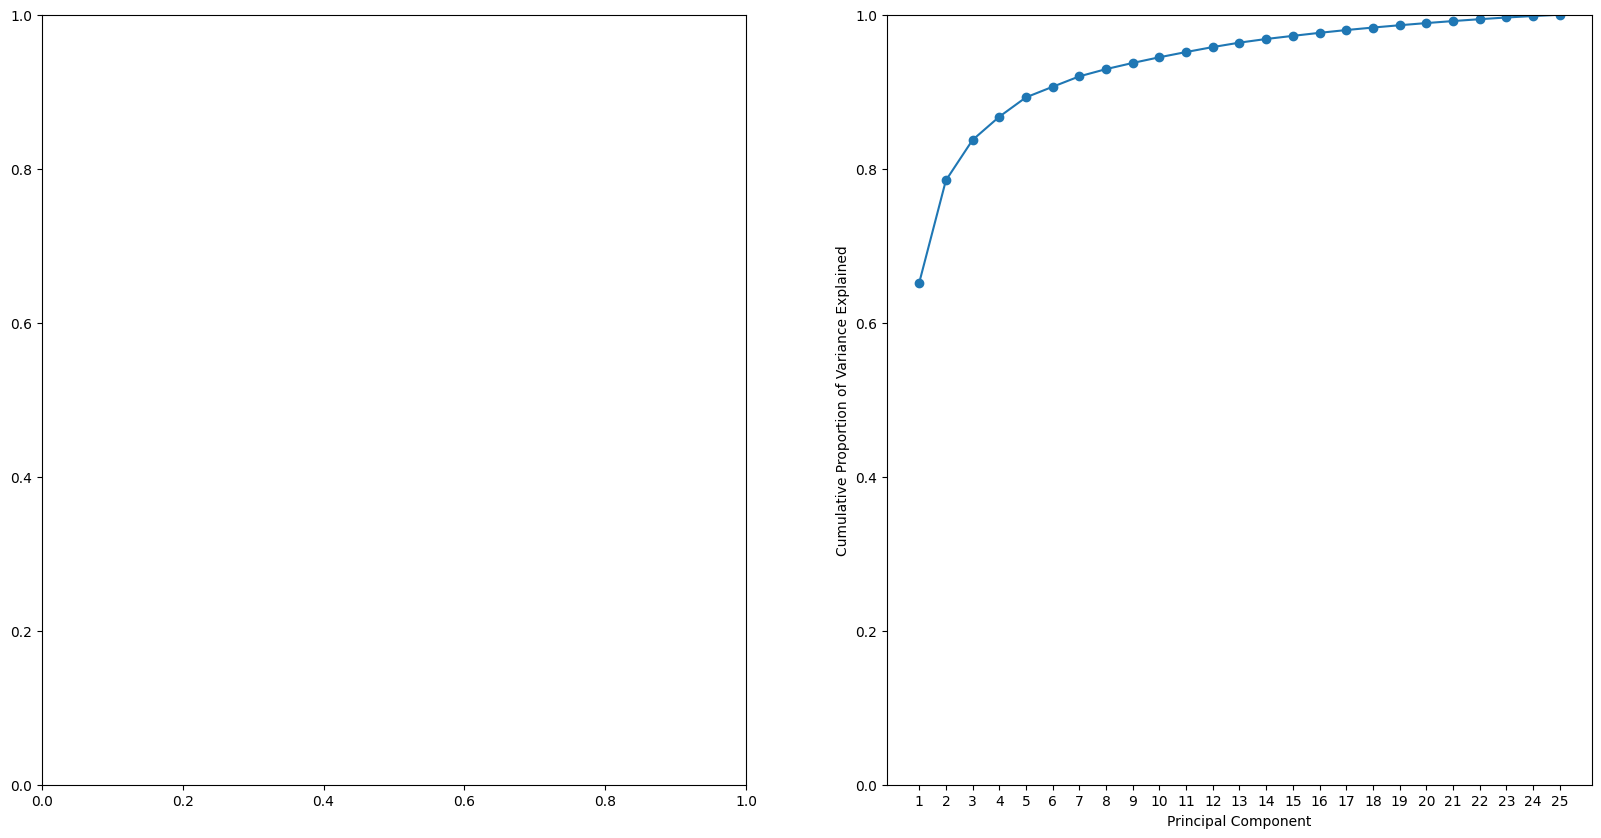

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ticks = np.arange(pcaStock.n_components_)+1

ax = axes[1]
ax.plot(ticks,
        pcaStock.explained_variance_ratio_.cumsum(),
        marker='o');
ax.set_xlabel('Principal Component');
ax.set_ylabel('Cumulative Proportion of Variance Explained');
ax.set_ylim([0, 1]);
ax.set_xticks(ticks);

In [63]:
pcaStock.explained_variance_ratio_.cumsum()

array([0.65182661, 0.78484777, 0.83738071, 0.86749794, 0.89267426,
       0.90641425, 0.91995262, 0.92934452, 0.93736343, 0.94475411,
       0.9515396 , 0.95798315, 0.96374839, 0.9684766 , 0.97252886,
       0.97646986, 0.98009053, 0.98332612, 0.9863348 , 0.98914076,
       0.9917569 , 0.99418957, 0.99640004, 0.9982569 , 1.        ])

## Denoise a matrix
#### Assume $X=M+u$, where $M$ is a low-rank matrix and $u$ is a matrix of noise with $E(u)=0$.
 - We observe $X$. 
 - The goal is to compute $\hat{M}$, which is an estimate for $M$.

In [20]:
pca_estimator = PCA(n_components=2)
pca_estimator.fit(USArrests_scaled)

PCA(n_components=2)

In [21]:
data_compressed = pca_estimator.fit_transform(USArrests_scaled)
data_decompressed = pca_estimator.inverse_transform(data_compressed)

In [22]:
#info lost
sum(sum((USArrests_scaled-data_decompressed)**2))

26.499663415533263

In [29]:
# total info 
sum(sum((USArrests_scaled)**2))

200.0

## Can we use this for matrix completion?
- suppose that $X=M+u$ with low-rank $M$ and noise satisfying $E(u)=0$.
- we do not observe full $X$ (this is an $n\times p$ matrix)
- data in $X$ is missing at random with probability $1-\rho$, i.e., $\rho=\Pr(observe)$ and $1-\rho=\Pr(missing)$.
- how to estimate $M$?

In [65]:
n=2432
p=1243
M=np.ones((n,p))
M

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [66]:
u=np.random.normal(loc=0.0, scale=1.0, size=(n,p)) # generate normal random variables with mean 0, std deviation 1

In [67]:
X=M+u
X

array([[ 0.49038692,  1.72614834,  1.27181468, ...,  1.30879703,
         1.82920484,  0.18626738],
       [ 0.14964384,  1.54214153,  0.34057861, ...,  1.35099695,
         3.45943616, -1.15924955],
       [-0.17191512,  0.9903619 ,  2.06075376, ...,  2.0382493 ,
         1.02311194,  0.34921908],
       ...,
       [ 2.8447392 , -0.19714253,  1.74556387, ...,  2.32045232,
         1.85336933,  1.56278647],
       [ 2.28208919,  0.89784564,  1.73255741, ...,  0.27189488,
         0.15960565,  1.32384536],
       [-0.14520013,  2.10609745,  0.7668011 , ...,  1.91794942,
         0.9294374 ,  0.83886622]])

In [68]:
rho=0.5 # probability of observing the entry
Z=np.random.binomial(1, rho, size=(n,p)) # generate Bernoulli variables with mean equal to rho
# Z_(i,j): 1 means observed and 0 means missing
Z

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 0]])

In [69]:
X_obs=np.multiply(X,Z) # this is entry-wise multiplication, not the usual matrix multiplication.
X_obs

array([[ 0.49038692,  0.        ,  1.27181468, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         3.45943616, -0.        ],
       [-0.        ,  0.        ,  0.        , ...,  0.        ,
         1.02311194,  0.34921908],
       ...,
       [ 0.        , -0.        ,  1.74556387, ...,  0.        ,
         0.        ,  1.56278647],
       [ 0.        ,  0.        ,  1.73255741, ...,  0.27189488,
         0.15960565,  1.32384536],
       [-0.        ,  0.        ,  0.7668011 , ...,  0.        ,
         0.9294374 ,  0.        ]])

In [70]:
pca_estimator = PCA(n_components=2)
pca_estimator.fit(X_obs)
data_compressed = pca_estimator.fit_transform(X_obs)
data_decompressed = pca_estimator.inverse_transform(data_compressed)
data_decompressed_final = data_decompressed/np.mean(Z)
data_decompressed_final

array([[0.80008399, 0.91603785, 0.97370837, ..., 0.97586792, 0.92662682,
        1.01367113],
       [1.11611228, 0.9701539 , 1.10903614, ..., 0.89804559, 0.92918037,
        0.9573681 ],
       [0.83941487, 0.92676338, 1.00189481, ..., 0.96368603, 0.92452427,
        0.99894397],
       ...,
       [0.76989985, 0.90374454, 0.94052927, ..., 0.98775816, 0.93070411,
        1.03283173],
       [0.93782823, 0.89885351, 0.91678805, ..., 0.96745585, 0.95246819,
        1.06800563],
       [1.15222792, 0.89266008, 0.88662211, ..., 0.94150327, 0.98022411,
        1.11281443]])

## Try this on Netflix data?

In [71]:
Netflix = pd.read_csv('Netflix.csv')

In [72]:
Netflix

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1232,V1233,V1234,V1235,V1236,V1237,V1238,V1239,V1240,V1241
0,4,4,3,3,4,2,4,3,2,5,...,4,2,2,2,5,4,4,2,3,4
1,4,2,4,3,4,4,4,4,3,5,...,5,2,2,2,5,4,3,3,4,2
2,2,2,4,3,1,5,2,4,5,1,...,3,5,5,4,1,2,2,5,4,1
3,3,4,2,3,4,1,3,2,1,4,...,2,2,1,2,5,3,4,2,2,5
4,5,2,5,2,5,4,5,5,2,5,...,5,1,1,1,5,5,4,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,5,5,2,3,5,1,4,1,1,5,...,4,1,1,1,5,5,5,1,2,5
2408,1,4,2,4,1,2,2,1,3,1,...,1,5,5,4,1,1,2,4,2,4
2409,1,5,1,4,1,1,1,1,2,1,...,1,5,5,5,1,1,3,3,1,5
2410,1,2,3,4,1,4,2,3,5,1,...,1,5,5,5,1,1,1,5,2,1


In [73]:
data=Netflix.to_numpy()

In [74]:
data

array([[4, 4, 3, ..., 2, 3, 4],
       [4, 2, 4, ..., 3, 4, 2],
       [2, 2, 4, ..., 5, 4, 1],
       ...,
       [1, 5, 1, ..., 3, 1, 5],
       [1, 2, 3, ..., 5, 2, 1],
       [5, 2, 4, ..., 3, 4, 2]])

In [75]:
n=2412
p=1241
rho=0.5 # probability of observing the entry
Z=np.random.binomial(1, rho, size=(n,p)) # generate Bernoulli variables with mean equal to rho
X_obs=np.multiply(data,Z) # this is entry-wise multiplication, not the usual matrix multiplication.
X_obs

array([[0, 4, 0, ..., 2, 0, 0],
       [4, 0, 4, ..., 3, 4, 2],
       [2, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 5, 0, ..., 3, 0, 0],
       [1, 0, 0, ..., 5, 2, 1],
       [5, 2, 0, ..., 0, 0, 2]])

In [78]:
pca_estimator = PCA(n_components=2)
pca_estimator.fit(X_obs)
data_compressed = pca_estimator.fit_transform(X_obs)
data_decompressed = pca_estimator.inverse_transform(data_compressed)
data_decompressed_final = data_decompressed/np.mean(Z)
data_decompressed_final

array([[3.83036234, 3.7975911 , 2.76975457, ..., 1.6472015 , 3.0025566 ,
        4.09466389],
       [4.57168383, 2.07770505, 4.37814857, ..., 2.76907544, 4.62564242,
        2.38558019],
       [2.20934531, 1.69854159, 3.97362842, ..., 4.5648923 , 3.71103373,
        1.17088505],
       ...,
       [0.39763675, 4.9700959 , 0.79346338, ..., 2.67706683, 0.421308  ,
        4.28867128],
       [1.02239969, 2.38149435, 3.06669101, ..., 4.66662094, 2.61685928,
        1.55344104],
       [4.07517908, 2.20575957, 4.12576239, ..., 2.95610262, 4.28247234,
        2.36642787]])

In [79]:
data_decompressed_final.round()

array([[4., 4., 3., ..., 2., 3., 4.],
       [5., 2., 4., ..., 3., 5., 2.],
       [2., 2., 4., ..., 5., 4., 1.],
       ...,
       [0., 5., 1., ..., 3., 0., 4.],
       [1., 2., 3., ..., 5., 3., 2.],
       [4., 2., 4., ..., 3., 4., 2.]])